In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
wh = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
wh.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
wh.columns=['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

In [5]:
wh.tail()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
wh.isnull().sum()

Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [7]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [8]:
wh.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness_Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness_Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard_Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia_Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [9]:
wh.corr()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [10]:
wh.nunique()

Country              158
Region                10
Happiness_Rank       157
Happiness_Score      157
Standard_Error       153
Economy              158
Family               158
Health               157
Freedom              158
Trust                157
Generosity           158
Dystopia_Residual    158
dtype: int64

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

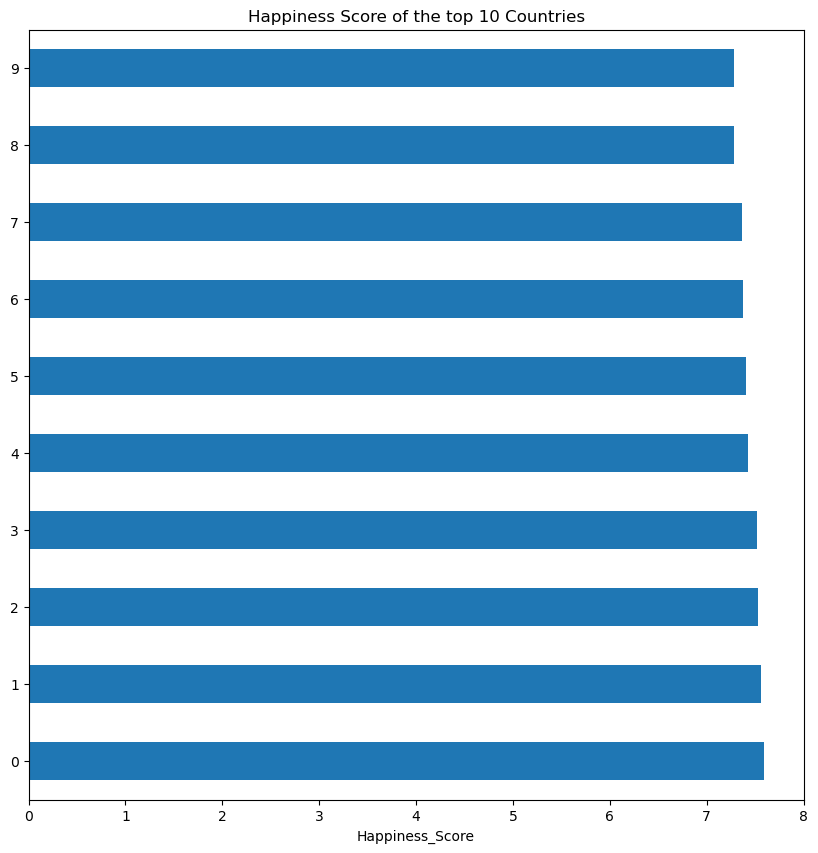

In [11]:
wh['Happiness_Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize=(10,10))
plt.xlabel("Happiness_Score")
plt.title('Happiness Score of the top 10 Countries')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


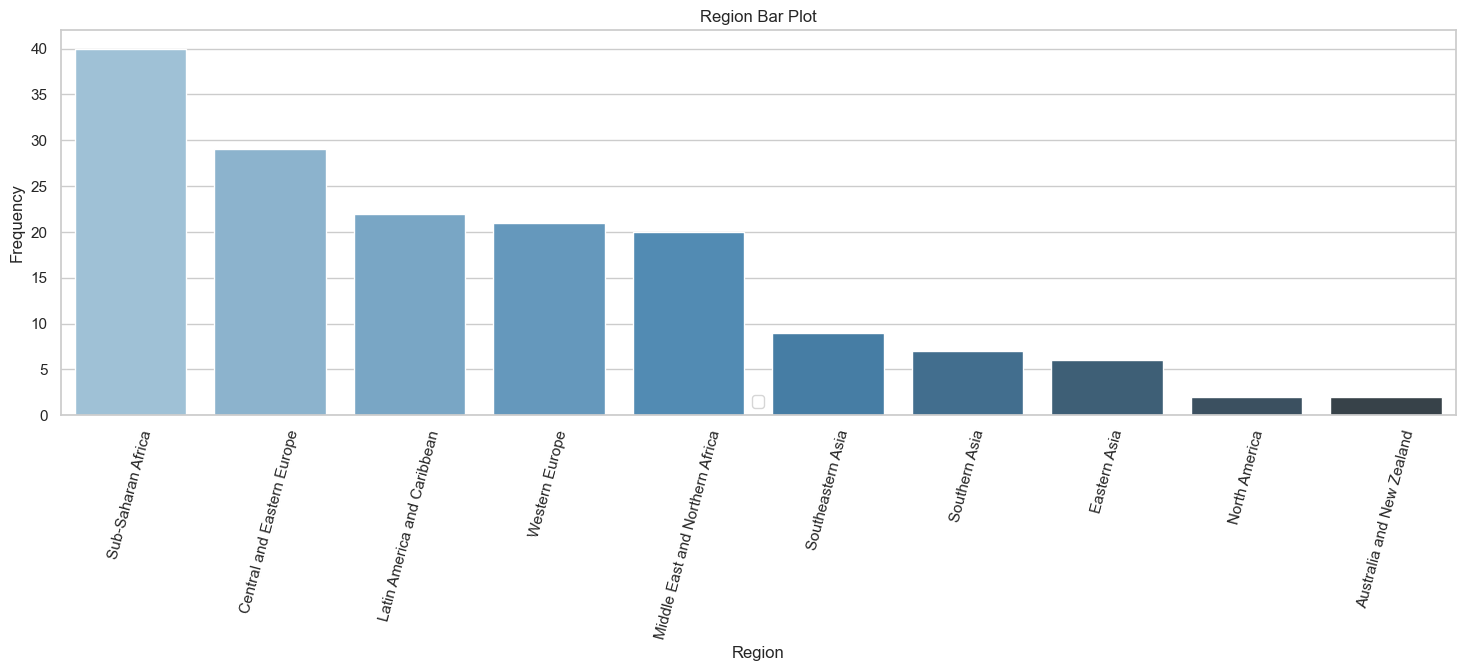

In [12]:
# Bar Plot
plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
ax = sns.barplot(x=wh['Region'].value_counts().index, y=wh['Region'].value_counts().values,palette="Blues_d")
plt.legend(loc=8)
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('Region Bar Plot')
plt.show()

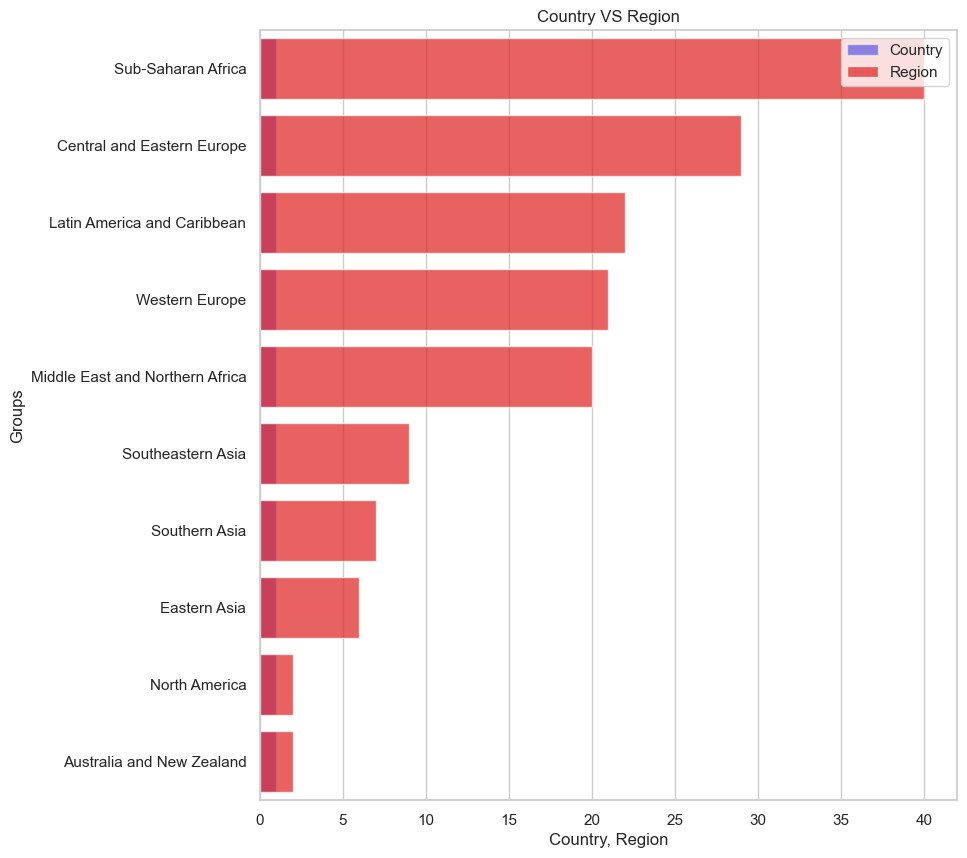

In [13]:
f, ax= plt.subplots(figsize=(9,10))
sns.barplot(x=wh['Country'].value_counts().values, y=wh['Country'].value_counts().index, alpha=0.5, color='blue', label='Country')
sns.barplot(x=wh['Region'].value_counts().values, y=wh['Region'].value_counts().index, alpha=0.7, color='red', label='Region')
ax.legend(loc='upper right', frameon= True)
ax.set(xlabel='Country, Region', ylabel= 'Groups', title= "Country VS Region")
plt.show()

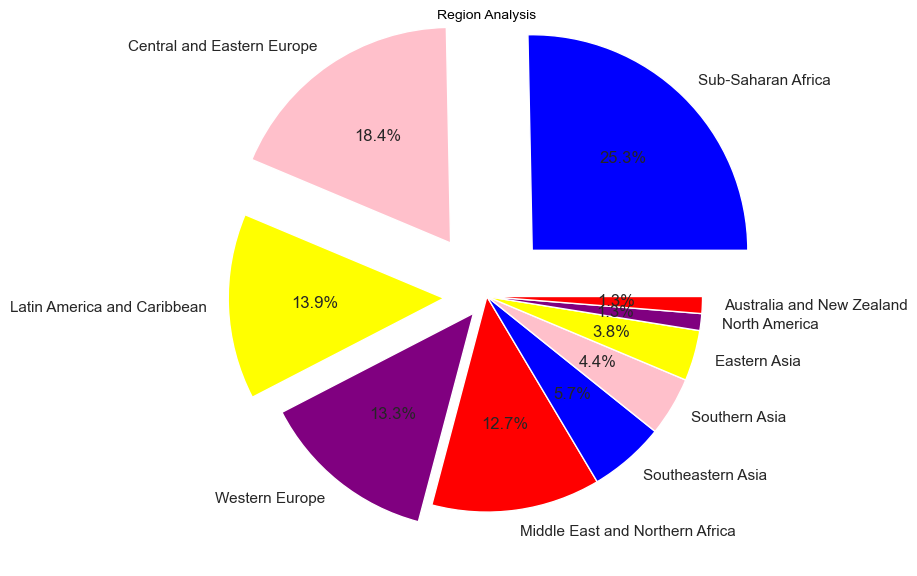

In [14]:
labels = wh['Region'].value_counts().index
colors= ['blue', 'pink', 'yellow', 'purple', 'red']
explode= [0.3,0.3,0.2,0.1,0,0,0,0,0,0]
values= wh['Region'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values, explode= explode, labels= labels, colors= colors, autopct='%1.1f%%')
plt.title('Region Analysis', color= 'black', fontsize= 10)
plt.show()

<Figure size 1500x700 with 0 Axes>

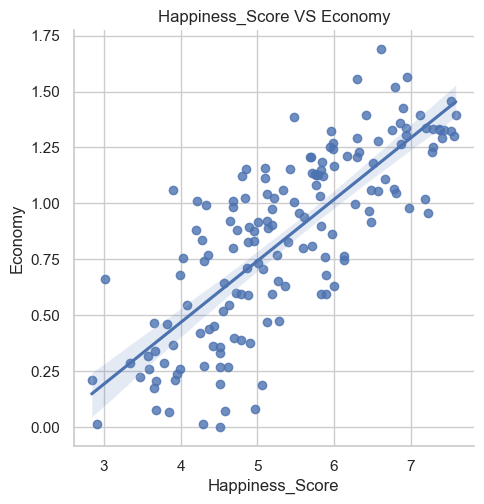

In [15]:
plt.figure(figsize=(15,7))
sns.lmplot(x= 'Happiness_Score', y= 'Economy', data= wh)
plt.xlabel= ('Happiness_Score')
plt.ylabel('Economy')
plt.title('Happiness_Score VS Economy')
plt.show()

TypeError: 'str' object is not callable

<Figure size 1500x700 with 0 Axes>

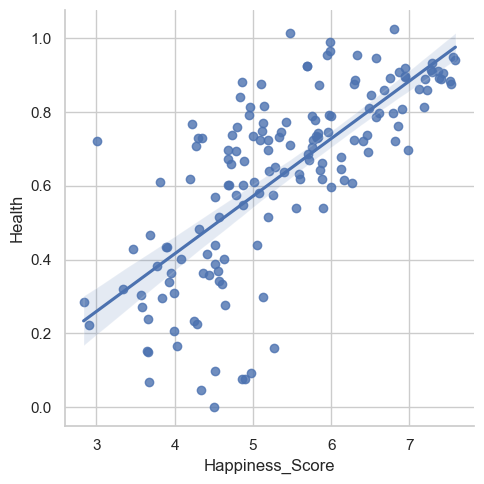

In [16]:
plt.figure(figsize=(15,7))
sns.lmplot(x= 'Happiness_Score', y= 'Health', data=wh)
plt.xlabel('Happiness_Score')
plt.ylabel('Health')
plt.title('Happiness_Score VS Health')
plt.show()

TypeError: 'str' object is not callable

<Figure size 1500x700 with 0 Axes>

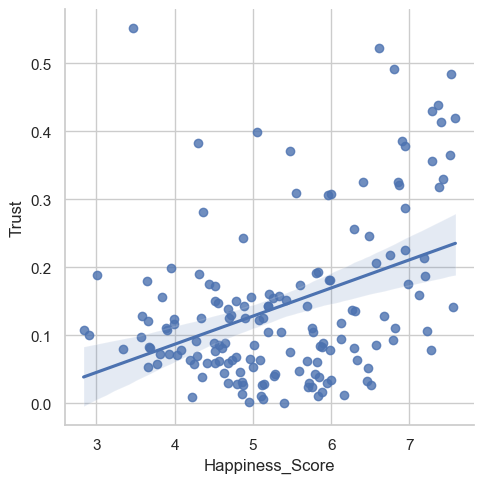

In [17]:
plt.figure(figsize=(15,7))
sns.lmplot(x= 'Happiness_Score', y= 'Trust', data= wh)
plt.xlabel('Happiness_score')
plt.ylabel('Trust')
plt.title('Happiness_Score VS Trust')
plt.show()

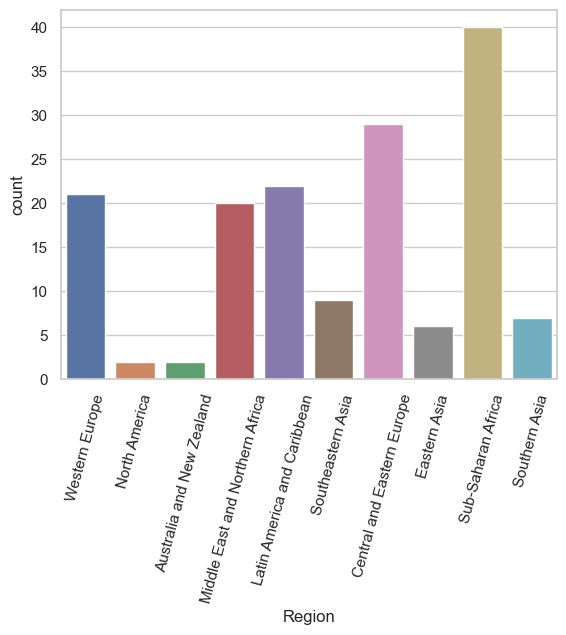

In [18]:
sns.countplot(wh['Region'])
plt.xticks(rotation=75)
plt.show()

TypeError: 'str' object is not callable

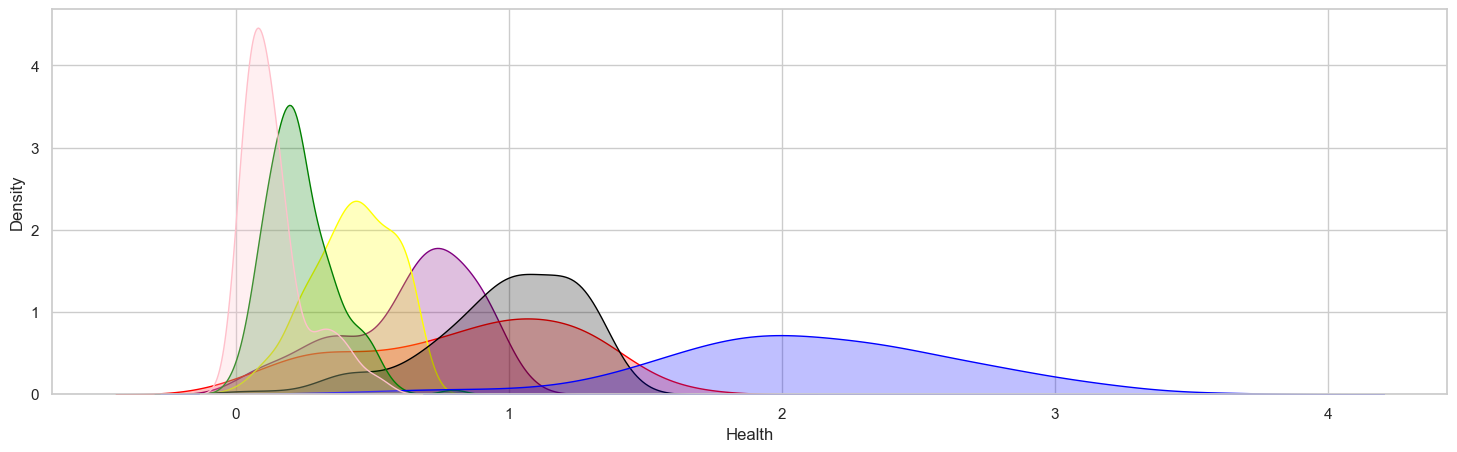

In [19]:
plt.figure(figsize=(18,5))
sns.kdeplot(wh['Health'], shade= True, color= 'purple')
sns.kdeplot(wh['Economy'], shade= True, color= 'red')
sns.kdeplot(wh['Freedom'], shade= True, color= 'yellow')
sns.kdeplot(wh['Family'], shade= True, color= 'black')
sns.kdeplot(wh['Generosity'], shade= True, color= 'green')
sns.kdeplot(wh['Dystopia_Residual'], shade= True, color= 'blue')
sns.kdeplot(wh['Trust'], shade= True, color= 'pink')

plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Kde Plot Analysis')
plt.show()

TypeError: 'str' object is not callable

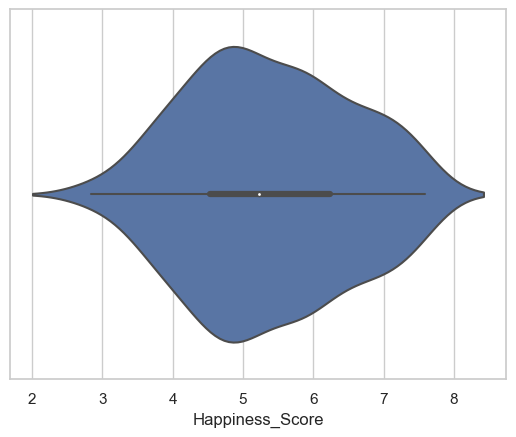

In [20]:
sns.violinplot(wh['Happiness_Score'])
plt.xlabel('Happiness_Score')
plt.ylabel('Frequency')
plt.title('Violin Happiness_Score')
plt.show()

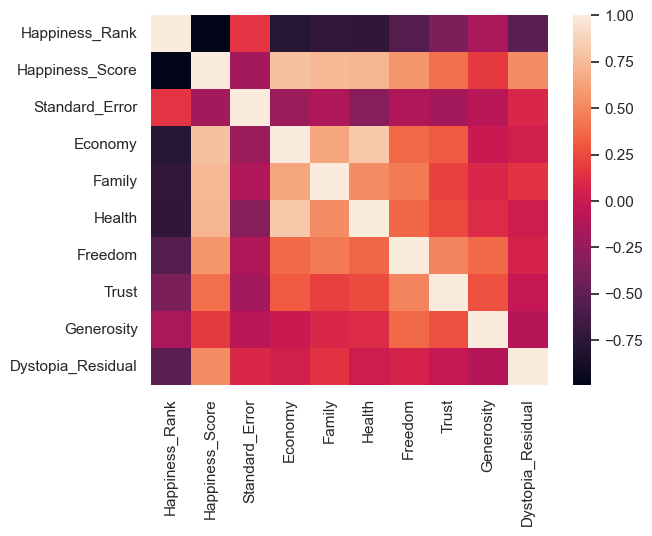

In [21]:
sns.heatmap(wh.corr())
plt.show()

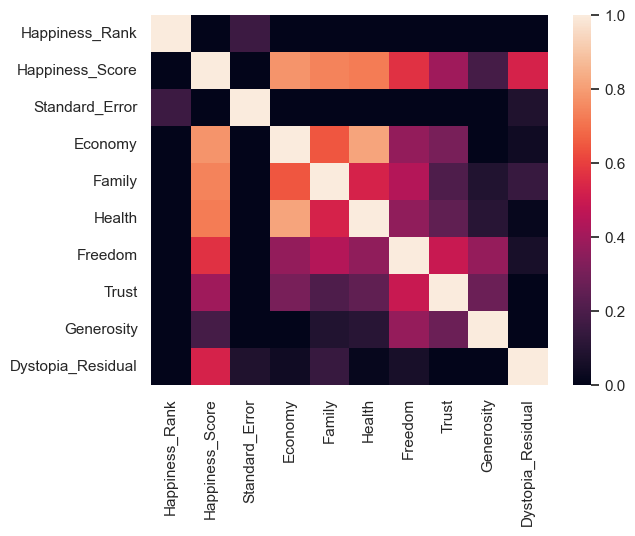

In [22]:
sns.heatmap(wh.corr(), vmin=0, vmax=1)
plt.show()

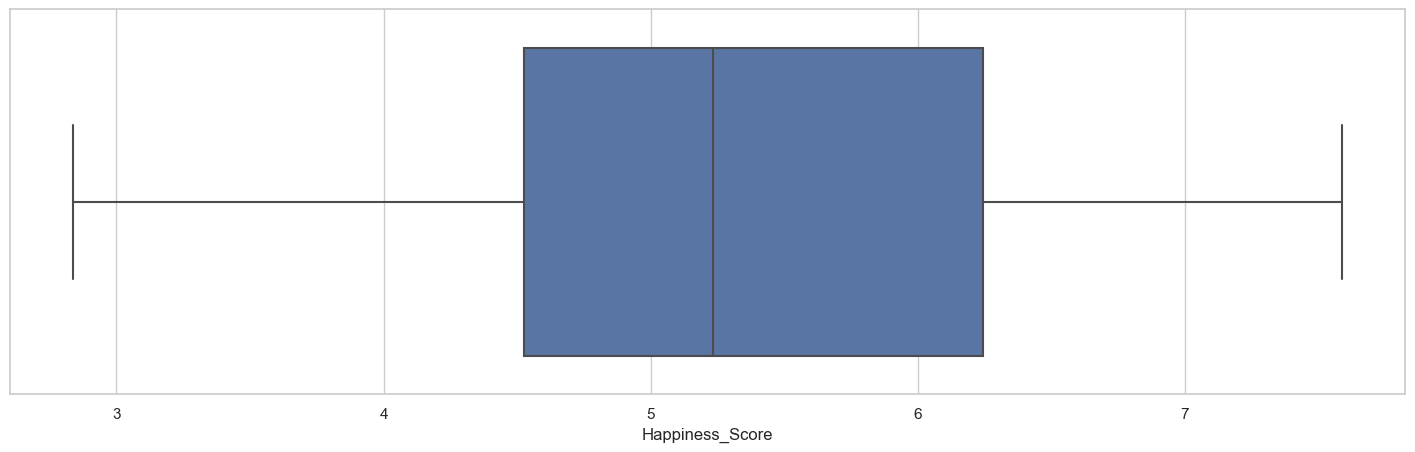

In [23]:
plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
sns.boxplot(wh['Happiness_Score'])
plt.show()

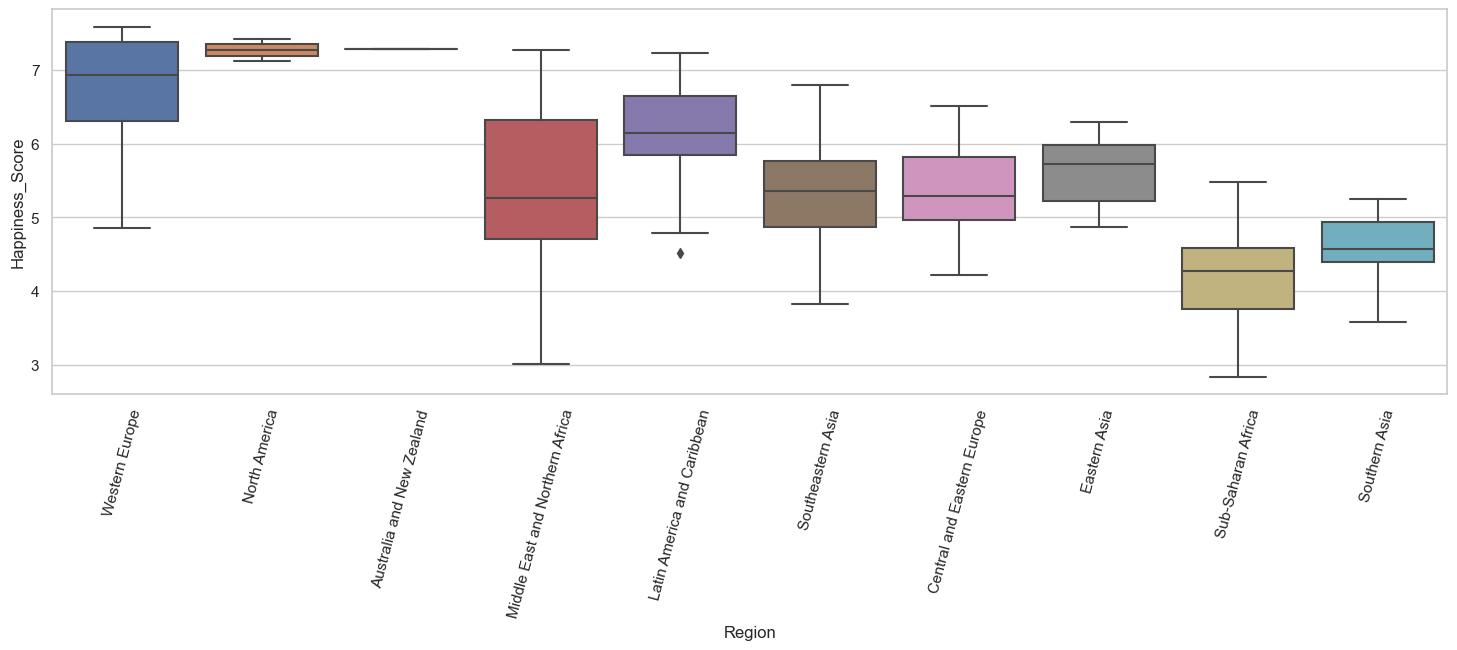

In [24]:
plt.figure(figsize=(18,5))
sns.boxplot(x= wh['Region'], y= wh['Happiness_Score'])
plt.xticks(rotation=75)
plt.show()

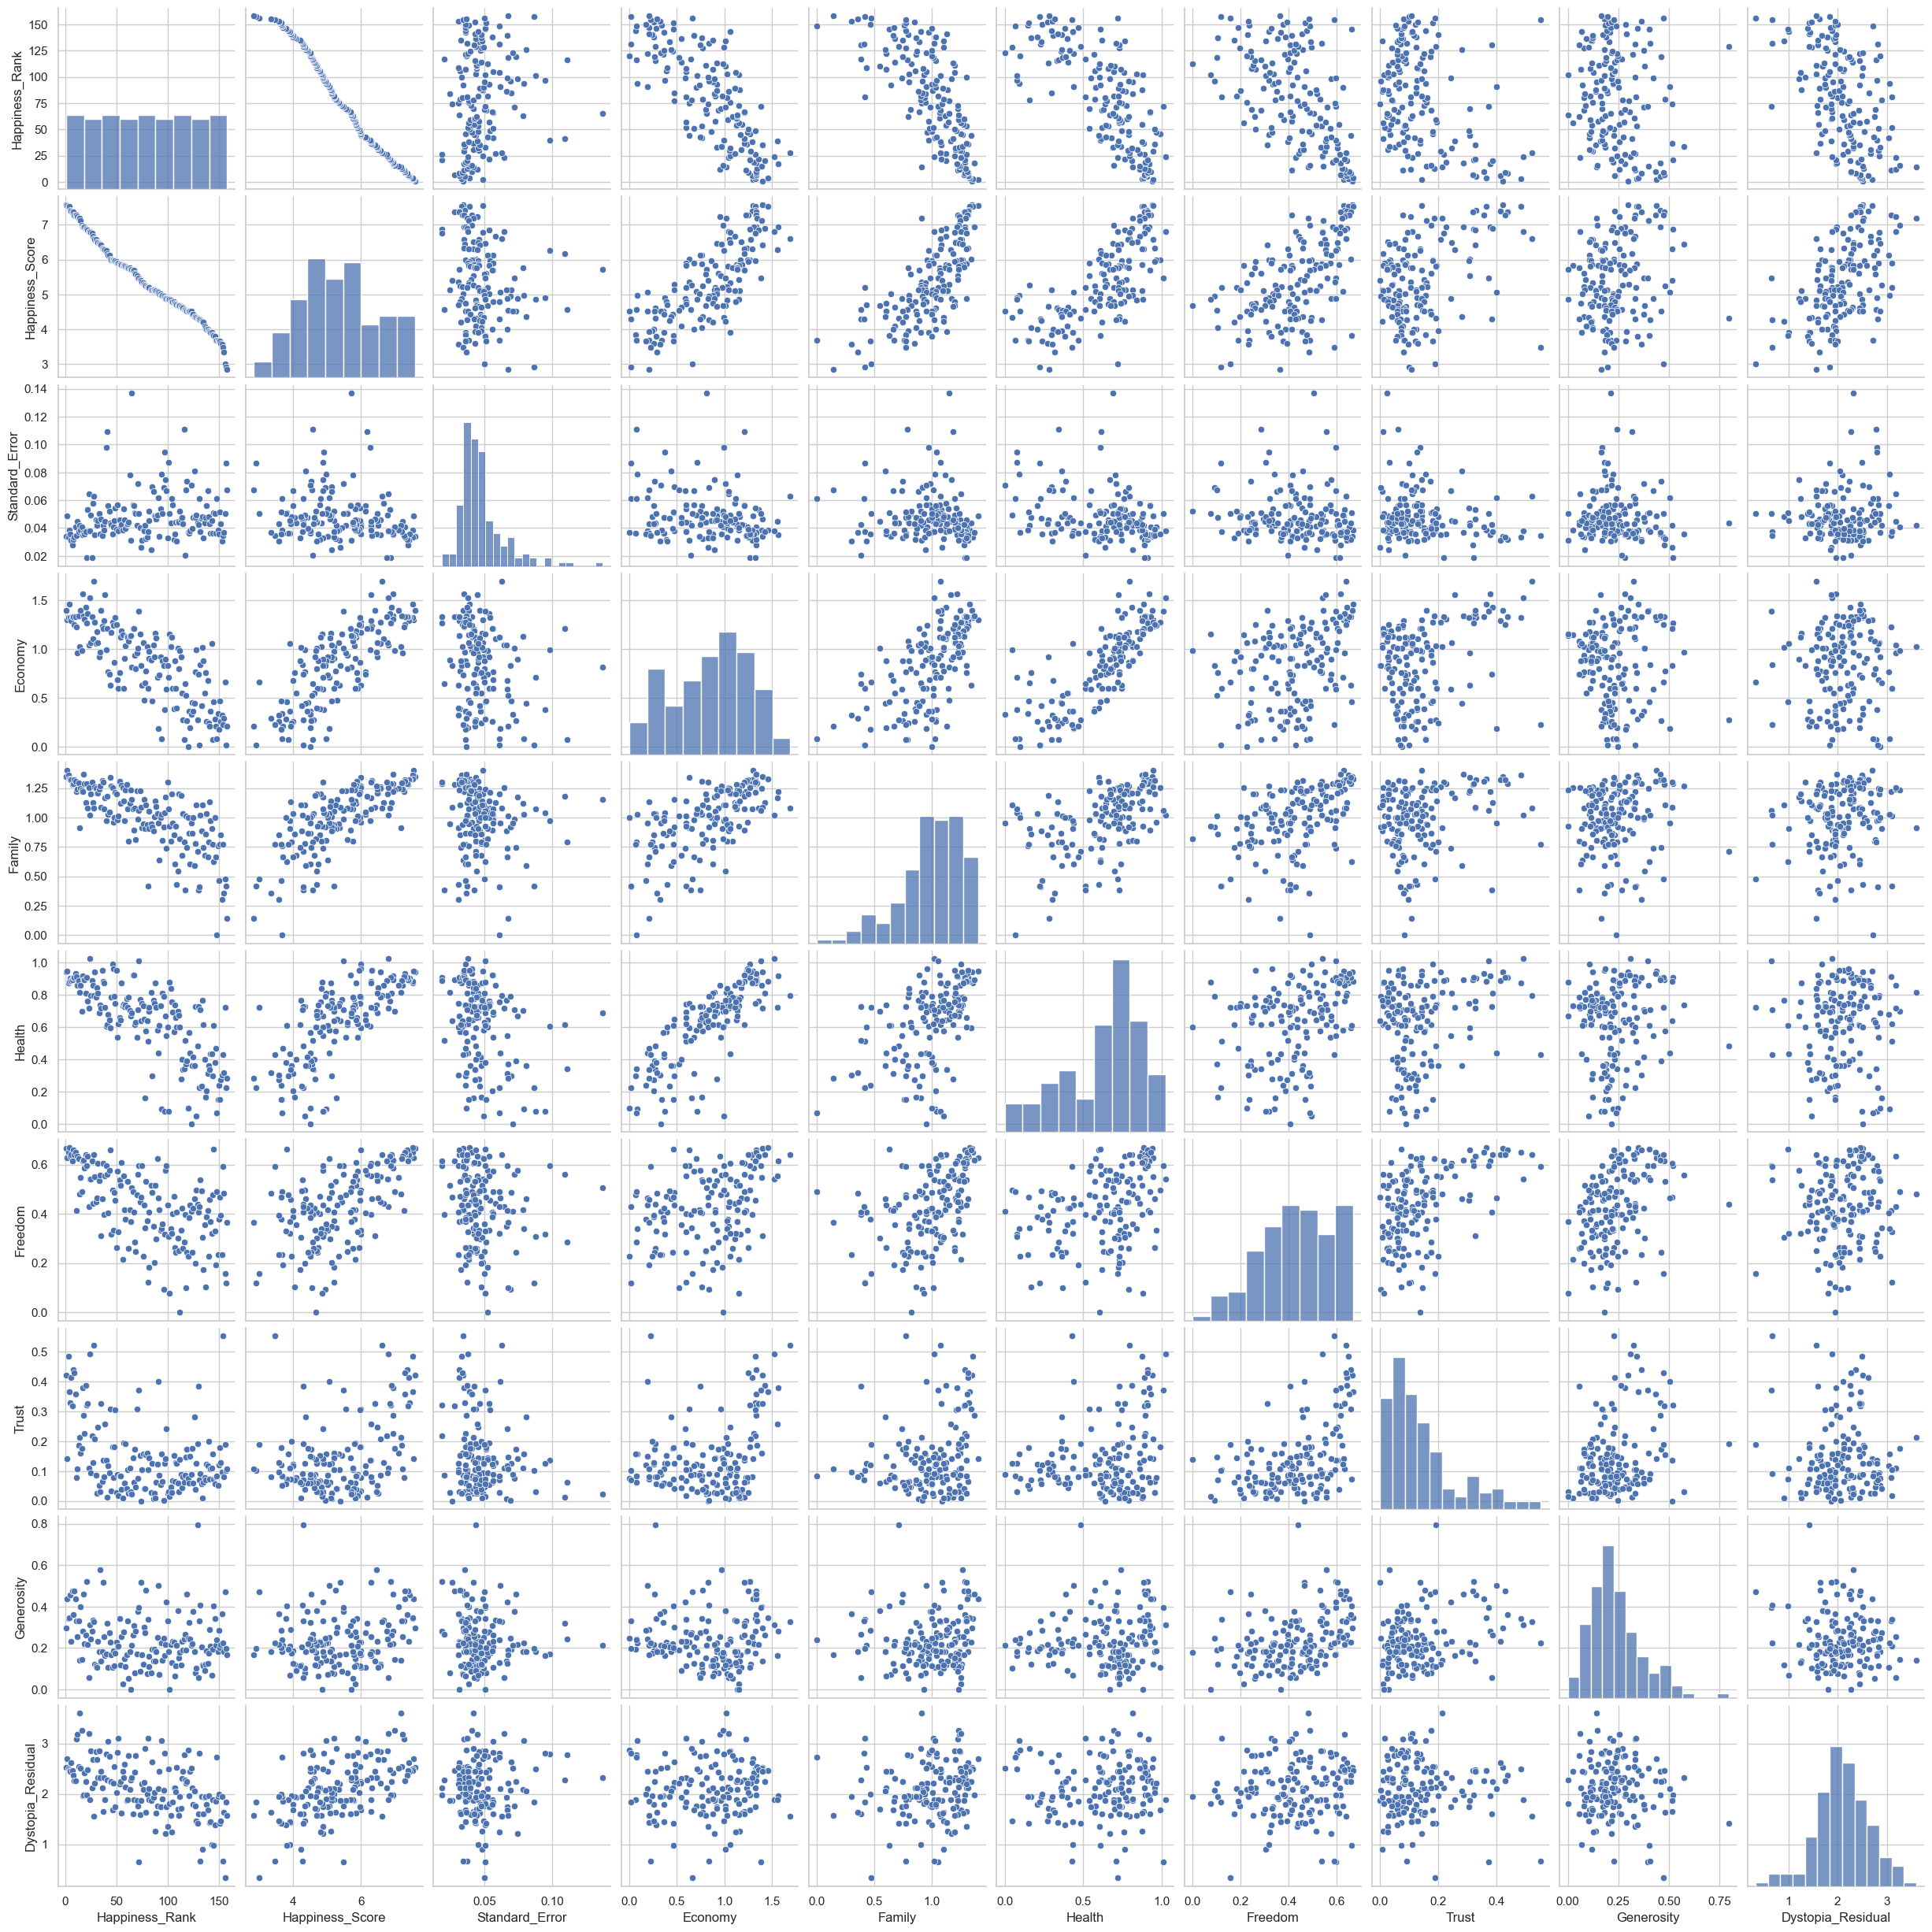

In [25]:
sns.pairplot(wh)
plt.show()

In [26]:
wh.groupby('Region')[['Happiness_Score']].mean()


,Happiness_Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


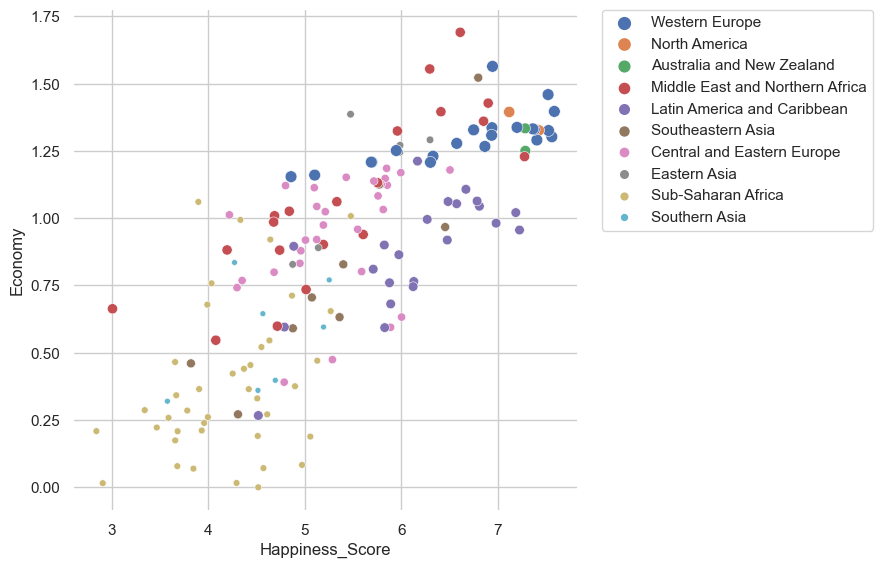

In [27]:
f, ax= plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left= True, bottom= True)
sns.scatterplot(x="Happiness_Score", y= "Economy", hue= "Region", size= "Region", data= wh)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

In [28]:
wh.head(10)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


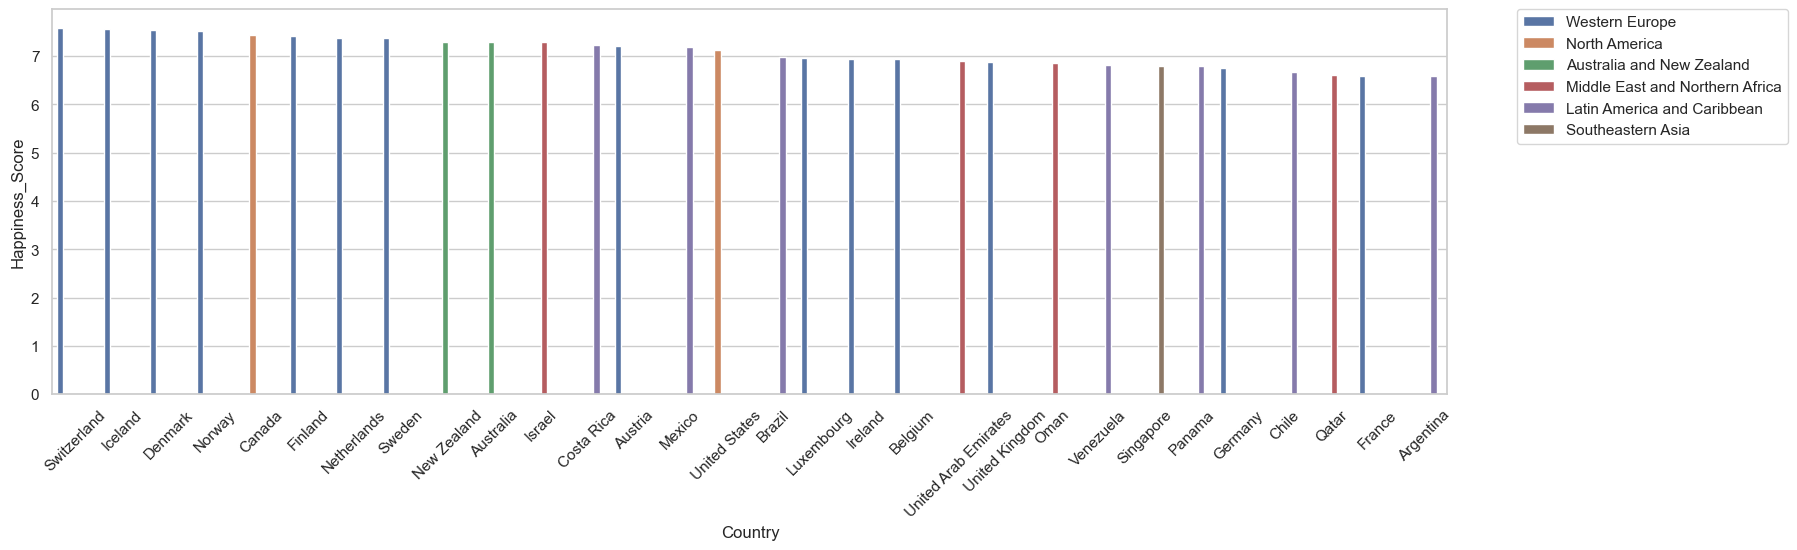

In [29]:
plt.figure(figsize=(18,5))
sns.barplot(x= wh.Country[:30], y= wh.Happiness_Score[:30], hue= wh.Region[:30], data= wh)
plt.legend(bbox_to_anchor= (1.05,1), loc= 'upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [31]:
# LinearRegression

lr = LinearRegression()
x = wh['Economy'].values.reshape(-1,1)
y = wh['Happiness_Score'].values.reshape(-1,1)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)


In [38]:
%pylab inline
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


Populating the interactive namespace from numpy and matplotlib


In [42]:
xtest = pd.DataFrame(x_test)
ypred = pd.DataFrame(y_pred)
prediction = pd.concat([xtest, ypred], axis=1)
prediction.columns = ['xtest', 'ypred']
prediction.sort_values(by= 'xtest', ascending = False, axis=0, inplace= True)
prediction.head()

,xtest,ypred
40,1.69042,7.448315
32,1.56391,7.143925
27,1.42727,6.815162
47,1.38604,6.715961
0,1.33171,6.585240


In [43]:
xtest = pd.DataFrame(x_test)
ytest = pd.DataFrame(y_test)
test = pd.concat([xtest, ytest], axis=1)
test.columns = ['xtest', 'ytest']
test.sort_values(by= 'xtest', ascending= False, axis=0, inplace= True)
test.head()

,xtest,ytest
40,1.69042,6.611
32,1.56391,6.946
27,1.42727,6.901
47,1.38604,5.474
0,1.33171,7.364


In [44]:
# Multiple Linear Regression

X = wh[['Economy', 'Health', 'Family', 'Freedom']].values
Y = wh['Happiness_Score'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

mlr = LinearRegression()
mlr.fit(X_train, Y_train)
Y_predict = pd.DataFrame(mlr.predict(X_test))
Y_test = pd.DataFrame(Y_test)

In [46]:
# Comparing the test and prediction

comp = pd.concat([Y_predict, Y_test], axis=1)
comp.columns = ['Y_predict', 'Y_test']
comp.sort_values(by= 'Y_test', ascending = False, axis=0, inplace= True)
comp.sample(10)

,Y_predict,Y_test
15,5.968570,4.885
45,5.907276,5.754
9,5.435511,5.007
44,6.799956,6.937
0,6.966098,7.364
10,6.257283,6.786
17,4.959818,4.876
2,4.391026,4.633
11,4.574340,3.904
5,4.097896,4.507


In [47]:
wh.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
